<a href="https://colab.research.google.com/github/PRyuC/Pascal_INFO5502_Summer2022/blob/main/lab_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The fourth Lab-assignment (07/26/2022 11:59'AM' - 07/29/2022 11:59PM, 50 points in total)

The purpose of this exercise is to understand Exploratory Data Analysis, we will practice the EDA by working on multiple datasets which have different characteristics.

Question 1 (10 points). Understand a text corpus for domain-specific text classification. Download the dataset from the following link: https://osf.io/8mjcy/ . Conduct EDA of the dataset from the following aspects:

(1) How many categories in total?

(2) How many documents under each category?


In [48]:
from google.colab import files                 
upload = files.upload()                              # uploading the zip to colab

!unzip /content/preprocessed_cases[cases_29404].zip  # unzipping everything
%cd /content/preprocessed_cases[cases_29404]         #changing the directory to the zip file

/content/preprocessed_cases[cases_29404]


In [57]:
# Your answer here (code + explanation):

#(1)
import os                                              # importing the os module
print(len(os.listdir()), 'categories in the dataset')  # printing the amount of directories (i.e., of categories)
print()

#(2)
for item in os.listdir():      
  count = 0                                                       # creating a counter   
  dir_path = r'/content/preprocessed_cases[cases_29404]/' + item  # going over each directory adding it the end of path name
  for path in os.scandir(dir_path):                               
    if path.is_file():                                            # scanning each directory for files
      count += 1                                                  # counting all files progressively
  print("Folder", dir_path[-2:], 'countains', count, "files")     # returning the count for each category

76 categories in the dataset

Folder 56 countains 395 files
Folder 60 countains 42 files
Folder 31 countains 516 files
Folder 45 countains 1085 files
Folder /5 countains 751 files
Folder 54 countains 95 files
Folder 16 countains 826 files
Folder /6 countains 380 files
Folder 21 countains 735 files
Folder 34 countains 786 files
Folder 53 countains 142 files
Folder 28 countains 315 files
Folder 36 countains 889 files
Folder 19 countains 349 files
Folder 71 countains 457 files
Folder /3 countains 184 files
Folder 44 countains 825 files
Folder 55 countains 48 files
Folder /1 countains 775 files
Folder /2 countains 179 files
Folder 33 countains 272 files
Folder 66 countains 207 files
Folder 22 countains 284 files
Folder 20 countains 1129 files
Folder 10 countains 584 files
Folder 77 countains 146 files
Folder 24 countains 628 files
Folder 63 countains 194 files
Folder 35 countains 68 files
Folder 15 countains 257 files
Folder 50 countains 68 files
Folder 41 countains 1020 files
Folder 73 co

Question 2 (40 points). Continue practicing how to do simple exploratory data analysis with Python. The dataset that has been used in this question is called Student Academics Performance Data Set, which can be downloaded at: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab-assignment-04-student-performance.csv . Please conduct the following analysis:

(1) Description of all the columns: for each colmun, count number of rows, number of unqiue element, the frequency of each unqiue element. 


(2)  Visualize the count for each value in the 'Study Hours' column. Note: Study Hours values comes from this >= 6 hours Good >= 4 hours Average < 2 hours Poor.

(3) Using factorplot to show the relationship between numerical and categorical value. Please use figure to show relation between [Study Hours] and [End Semester Percentage]. Percentage is calculated based on the following:

if percentage >=80 then Best
If percentage >= 60 but less than 80 then Very Good
If percentage >= 45 but less than 60 then Good
If Percentage >= 30 but less than 45 then Pass
If Percentage < 30 then Fail

(4) Get the correlation from the data, then plug it to heatmap function and show it as following:

[heatmap.png](attachment:heatmap.png)

In [61]:
# going back to content directory
%cd /content                     

# uploading the lab-04 dataset to colab
from google.colab import files  
upload = files.upload()           

/content


Saving lab-assignment-04-student-performance.csv to lab-assignment-04-student-performance.csv


In [79]:
# Your answer here (code + explanation):

#(1)
import pandas as pd # importing the pandas package

df = pd.read_csv("/content/lab-assignment-04-student-performance.csv") # assigning the data to a pd dataframe variable
pd.set_option('display.max_columns', None)                             # setting to show all the columns


df.describe() # shows number of rows for each column, number of unique elements, but the frequency only for top element

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
count,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131,131
unique,2,5,4,4,4,4,2,1,2,2,5,3,6,6,5,5,3,3,2,4,3,3
top,M,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,Medium,Small,Um,Um,Service,Housewife,Large,Average,Govt,Eng,Small,Good
freq,72,57,59,65,63,54,78,131,92,76,63,89,40,52,38,115,58,59,91,62,78,56


In [66]:
# alternatively
print(df.shape, '\n') # shows number of rows, columns

for col in df:
  print(col + ':', df[col].nunique(), 'unique elements') # prints name of column, number of unique elements
  print(df[col].value_counts())       # prints frequency for each element in column
  print()                             

(131, 22) 

ge: 2 unique elements
M    72
F    59
Name: ge, dtype: int64

cst: 5 unique elements
OBC     57
G       44
ST      20
MOBC     6
SC       4
Name: cst, dtype: int64

tnp: 4 unique elements
Good    59
Vg      38
Pass    25
Best     9
Name: tnp, dtype: int64

twp: 4 unique elements
Good    65
Vg      44
Pass    17
Best     5
Name: twp, dtype: int64

iap: 4 unique elements
Vg      63
Good    53
Best     8
Pass     7
Name: iap, dtype: int64

esp: 4 unique elements
Good    54
Vg      42
Pass    27
Best     8
Name: esp, dtype: int64

arr: 2 unique elements
N    78
Y    53
Name: arr, dtype: int64

ms: 1 unique elements
Unmarried    131
Name: ms, dtype: int64

ls: 2 unique elements
V    92
T    39
Name: ls, dtype: int64

as: 2 unique elements
Paid    76
Free    55
Name: as, dtype: int64

fmi: 5 unique elements
Medium    63
Am        27
Low       20
High      15
Vh         6
Name: fmi, dtype: int64

fs: 3 unique elements
Small      89
Average    40
Large       2
Name: fs, dtype: int6

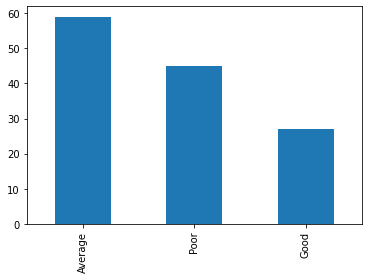

In [67]:
#(2)
import matplotlib.pyplot as plt          # importing the matplotlib.pyplot collection

df['sh'].value_counts().plot(kind='bar') # using a bar plot to visualize how many of each element

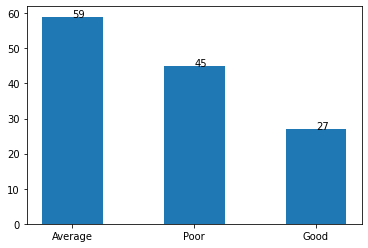

In [40]:
test = df['sh'].value_counts().to_dict()        # transforming value counts to dictionary
plt.bar(test.keys(), test.values(), width=0.5)  # passing keys and values as arguments, keys as x, values as height
for k,v in test.items():                        # adding these to the top of bars
  plt.text(k, v, v)

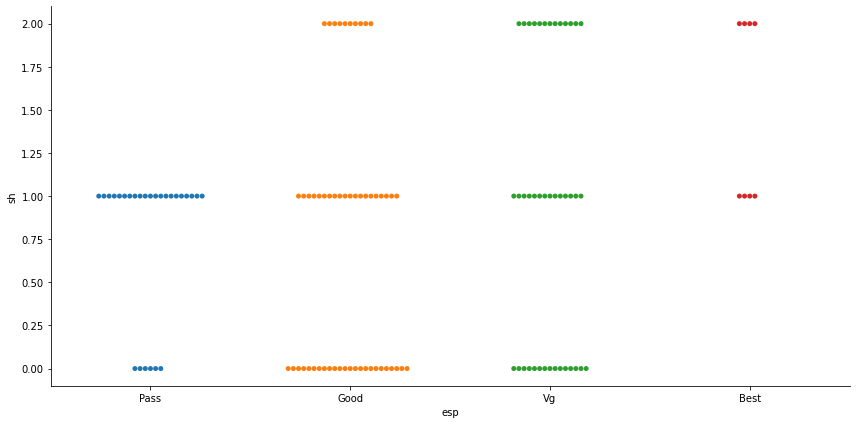

In [68]:
#(3)
import seaborn as sns             # importing seaborn library

df['sh'] = df['sh'].replace(['Good', 'Average', 'Poor'], [2, 1, 0]) # replacing categories to numbers to be able to catplot
df['esp'] = pd.Categorical(df['esp'], categories=["Pass", "Good", "Vg", "Best"], ordered=True) # ordering the categories in esp

sns.catplot(x="esp", y="sh", kind='swarm', data=df, height=6, aspect=2) # factorplot name changed to catplot, choosing swarm to better see

In [80]:
#(4)
for col in df:
  df[col] = pd.Categorical(df[col]) # changing all the columns in the datafram to categorical data
  df[col] = df[col].cat.codes       # getting the codes for all columns (each unique element in each category will be a number from 0 to n-elements in the category)

df = df.drop(columns=['ms']) # dropping the ms column since all elements are the same
df

,ge,cst,tnp,twp,iap,esp,arr,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,0,0,1,1,3,1,1,1,1,3,0,5,0,1,1,1,2,0,0,2,1
1,1,2,3,3,3,3,0,1,1,2,0,5,3,4,4,2,2,0,0,0,0
2,0,2,1,1,3,1,0,1,1,0,0,1,0,4,1,0,0,0,0,1,1
3,1,1,2,1,3,1,0,1,1,3,2,1,5,0,0,1,2,0,0,0,0
4,1,0,1,1,3,3,0,1,1,0,0,0,1,4,1,1,2,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,1,0,2,1,1,2,1,0,0,2,2,5,3,4,1,2,0,0,0,2,2
127,1,1,3,3,1,1,0,1,0,1,2,0,5,1,1,0,2,0,0,2,0
128,0,2,1,1,3,1,0,1,0,0,1,3,3,1,1,2,0,0,0,1,1
129,1,4,2,2,1,2,1,1,0,2,0,5,5,4,1,0,0,0,0,1,0


In [81]:
df = df.corr() # changing the dataframe to correlation values
df

,ge,cst,tnp,twp,iap,esp,arr,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
ge,1.000000,-0.016977,0.006935,-0.094917,-0.053492,0.069780,0.027204,0.014600,-0.055056,0.008516,0.084610,0.104596,0.248325,0.057232,-0.007515,-0.204366,-0.109366,0.100451,-0.098054,-0.153508,0.071129
cst,-0.016977,1.000000,0.006437,0.024047,0.040369,0.140074,0.138537,0.256753,0.056416,-0.064641,-0.177231,0.059259,0.145255,0.089111,0.074388,0.067923,-0.039874,-0.057139,0.052862,-0.118295,0.117910
tnp,0.006935,0.006437,1.000000,0.269661,0.098675,0.293045,0.012580,0.093466,0.122533,0.080136,0.056837,-0.092653,-0.030852,0.052263,0.059009,0.097854,0.016424,-0.001577,-0.001765,-0.125240,-0.039046
twp,-0.094917,0.024047,0.269661,1.000000,0.108756,0.265710,-0.104224,0.030679,-0.048394,-0.009892,0.013749,-0.084678,-0.140976,-0.080505,0.224947,-0.032935,0.059880,0.025208,0.005859,0.105384,-0.090624
iap,-0.053492,0.040369,0.098675,0.108756,1.000000,0.333076,0.035553,0.144850,0.050701,0.035649,0.064477,-0.008221,-0.005143,-0.091324,0.014454,0.139953,0.092307,-0.002621,0.025241,0.105921,-0.085863
esp,0.069780,0.140074,0.293045,0.265710,0.333076,1.000000,0.085867,0.184471,0.148154,0.045524,0.158971,-0.021203,-0.039767,0.058970,0.047507,0.087892,0.017952,0.009439,0.010564,-0.072989,-0.096510
arr,0.027204,0.138537,0.012580,-0.104224,0.035553,0.085867,1.000000,0.128527,-0.181143,0.043914,0.053735,0.115805,0.068089,-0.005274,-0.066153,-0.078630,-0.093818,-0.073728,-0.123966,-0.154324,0.056276
ls,0.014600,0.256753,0.093466,0.030679,0.144850,0.184471,0.128527,1.000000,-0.080306,0.063151,-0.061977,0.141975,0.154954,-0.029701,0.049060,-0.042200,-0.154153,-0.075818,-0.239277,-0.209410,0.097645
as,-0.055056,0.056416,0.122533,-0.048394,0.050701,0.148154,-0.181143,-0.080306,1.000000,-0.164794,0.060118,-0.219669,-0.170659,0.221889,-0.045719,0.094952,0.229447,0.060246,0.330530,0.162425,0.062961
fmi,0.008516,-0.064641,0.080136,-0.009892,0.035649,0.045524,0.043914,0.063151,-0.164794,1.000000,-0.014731,0.019720,-0.078210,-0.008806,-0.127578,0.021164,0.099858,0.002200,-0.134687,-0.167317,0.039566


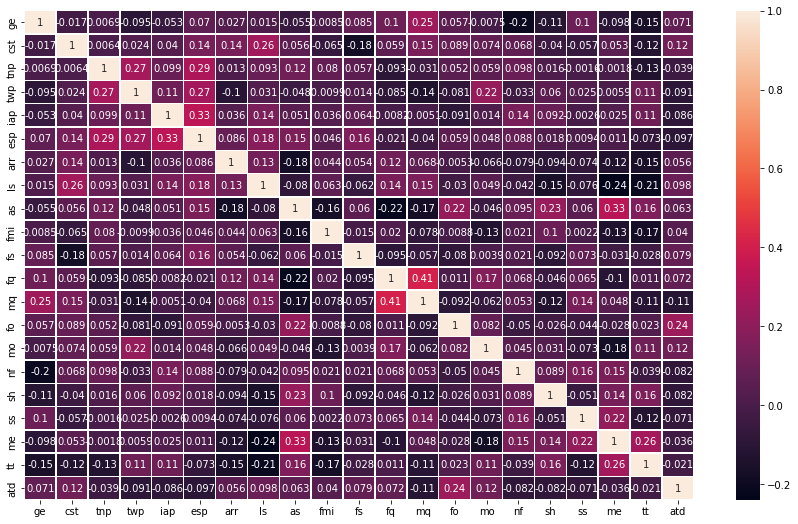

In [83]:
f, ax = plt.subplots(figsize=(15, 9)) # changing the size of the heatmap
sns.heatmap(data = df, annot=True, linewidths=.5, ax=ax) # annot to include the numbers